In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

From technical White paper:

"Visual stimuli were generated using custom scripts written in PsychoPy (Peirce, 2007, 2008) and were displayed using an ASUS PA248Q LCD monitor, with 1920x1200 pixels. The monitor was positioned 15 cm from the mouse’s eye, and spanned 120° x 95° of visual space without accounting for stimulus warping."

In [2]:
deg_to_rad = np.pi/180

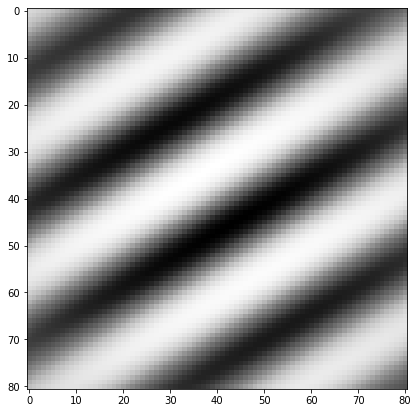

In [3]:
g = cv2.getGaborKernel(
    ksize=(80,80),
    sigma=50,
    theta=60*deg_to_rad,
    lambd=1/0.04,
    gamma=1,
    psi=0.25*2*np.pi, 
)

plt.figure(figsize=(10, 7))
plt.imshow(g, cmap='Greys')
plt.show()

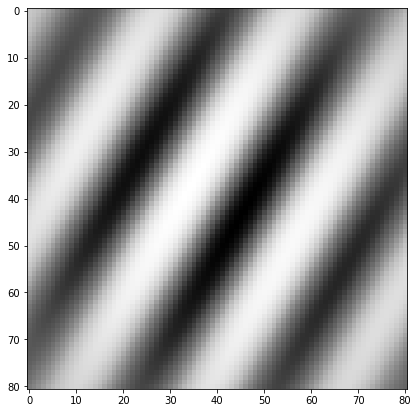

In [4]:
g = cv2.getGaborKernel(
    ksize=(80,80),
    sigma=40,
    theta=30*deg_to_rad,
    lambd=1/0.04,
    gamma=1,
    psi=0.25*2*np.pi, 
)

plt.figure(figsize=(10, 7))
plt.imshow(g, cmap='Greys')
plt.show()

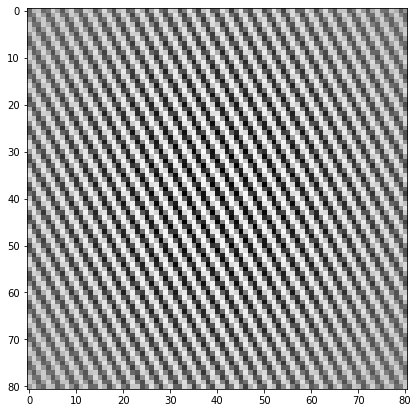

In [5]:
g = cv2.getGaborKernel(
    ksize=(80,80),
    sigma=40,
    theta=150*deg_to_rad,
    lambd=1/0.32,
    gamma=1,
    psi=0.75*2*np.pi,
)

plt.figure(figsize=(10, 7))
plt.imshow(g, cmap='Greys')
plt.show()

## Drifting Grating

In [6]:
frames_per_s = 50

In [7]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

deg_to_rad = np.pi/180

In [8]:
spat_freq = 0.08
temp_freq = 4
orientation = 0 # true values are 0, 45, 90, 135, 180, 225, 270, 315

In [9]:
win_title = f"Dynamic Grating {temp_freq} Hz"

cv2.namedWindow(win_title)

In [10]:
gs = [
    cv2.getGaborKernel(
        ksize=(80,80),
        sigma=40,
        theta=orientation*deg_to_rad,
        lambd=1/spat_freq,
        gamma=1,
        psi=i*2*np.pi,
    )
    for i in np.linspace(0, 1, int(frames_per_s/temp_freq))
]

In [ ]:
times = []
sleep = 1/frames_per_s

while True:
    # start_out = time.time()
    
    for i in range(len(gs)):
        start = time.time()

        cv2.imshow(win_title, gs[i])

        key = cv2.waitKey(5)
        if key == 27: # exit on ESC
            break
        
        end = time.time()
        dt = end-start
        if dt > sleep:
            print(f"{dt} > {sleep} ???")
        time.sleep(sleep - dt)
    
    # end_out = time.time()
    # times.append(end_out-start_out)

In [ ]:
# print(f"{np.mean(times)*freq:.2f} ± {np.std(times)*freq:.2f} ?= 1")

In [ ]:
cv2.destroyAllWindows()
cv2.waitKey(1)